<a href="https://colab.research.google.com/github/malinred/ML_Practice_codes/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# AYUSH JOHN DANIEL
# BL.EN.U4AIE23150

# Link to Github repository page
https://github.com/malinred/ML_Practice_codes/blob/34f35338d0c9bc3cbaf39477b7c0a5de0deeaa7d/ML_Lab_2.ipynb

#imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
#Q1
df = pd.read_excel(r"/content/Lab Session Data.xlsx", sheet_name='Purchase data')
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].copy() #this was done so that no change comes to the original data
C = df['Payment (Rs)'].values
print("\nDim=", A.shape[1])

print("num of vectors =", A.shape[0])

print("Rank=", np.linalg.matrix_rank(A.values))

A_pinv = np.linalg.pinv(A.values)
print("\npinv=",A_pinv)
#Q2
X = A_pinv.dot(C)
print("\nModel vector? = ", X)


Dim= 3
num of vectors = 10
Rank= 3

pinv= [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]

Model vector? =  [ 1. 55. 18.]


In [3]:
#Q3
df['Customer_Class'] = ['RICH' if x > 200 else 'POOR' for x in df['Payment (Rs)']]
headers = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
prices = df['Customer_Class']

main_func = LogisticRegression(max_iter=1000)
main_func.fit(headers, prices)

print(main_func.predict(headers))


['RICH' 'RICH' 'RICH' 'POOR' 'RICH' 'POOR' 'RICH' 'RICH' 'POOR' 'POOR']


In [4]:
#Q4
sp = pd.read_excel(r'/content/Lab Session Data.xlsx', sheet_name= 'IRCTC Stock Price')
#'Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'
B = sp[['Price']].copy()
print(f'Mean of the price coulumn - {statistics.mean(sp["Price"])} \nVariance of the price coulumn - {statistics.variance(sp["Price"])}')

Mean of the price coulumn - 1560.663453815261 
Variance of the price coulumn - 58732.365352539186


In [5]:
sp['Date'] = pd.to_datetime(sp['Date'])
wednesday_data = sp[sp['Date'].dt.day_name() == 'Wednesday']
wednesday_prices = wednesday_data['Price']
sample_mean_wed = statistics.mean(wednesday_prices)
print("Wednesday Sample Mean (Price):", sample_mean_wed)


Wednesday Sample Mean (Price): 1550.706


In [6]:
april_data = sp[sp['Month'] == 'Apr']
april_prices = april_data['Price']
sample_mean_apr = statistics.mean(april_prices)
print("April Sample Mean (Price):", sample_mean_apr)

April Sample Mean (Price): 1698.9526315789474


In [7]:
profit_wed_count = wednesday_data['Chg%'].apply(lambda x: x > 0).sum()
total_wed_count = len(wednesday_data)
prob_profit_wed = profit_wed_count / total_wed_count
print("Probability of making a profit on Wednesday:", prob_profit_wed)

Probability of making a profit on Wednesday: 0.42


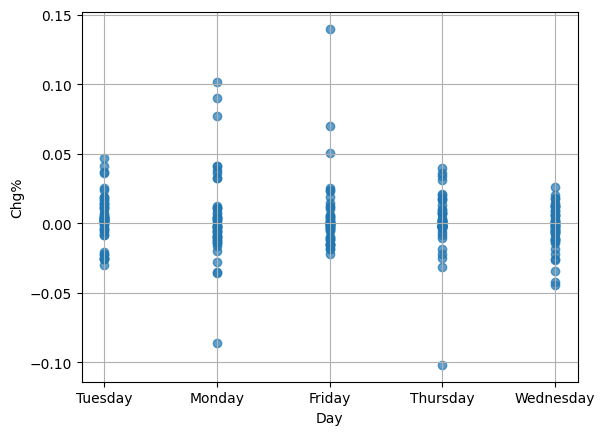

In [8]:
sp['DayName'] = sp['Date'].dt.day_name()
plt.scatter(sp['DayName'], sp['Chg%'], alpha=0.7)
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()

In [23]:
#Q5
tdf = pd.read_excel(r"/content/Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
#a
print(tdf.dtypes)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [24]:
#c
numerical = tdf.select_dtypes(include=[np.number]).columns
print(tdf[numerical].describe())

          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000


In [25]:
#d
print(tdf.isnull())

      Record ID    age    sex  on thyroxine  query on thyroxine  \
0         False  False  False         False               False   
1         False  False  False         False               False   
2         False  False  False         False               False   
3         False  False  False         False               False   
4         False  False  False         False               False   
...         ...    ...    ...           ...                 ...   
9167      False  False  False         False               False   
9168      False  False  False         False               False   
9169      False  False  False         False               False   
9170      False  False  False         False               False   
9171      False  False  False         False               False   

      on antithyroid medication   sick  pregnant  thyroid surgery  \
0                         False  False     False            False   
1                         False  False     False         

In [26]:
#f
for col in numerical:
    mean_val = tdf[col].mean()
    variance_val = tdf[col].var()
    std_val = tdf[col].std()
    print(f"{col} -> Mean: {mean_val:.3f}, Variance: {variance_val:.3f}, Std Dev: {std_val:.3f}")

Record ID -> Mean: 852947346.612, Variance: 57486250586150.344, Std Dev: 7581968.780
age -> Mean: 73.556, Variance: 1401800.869, Std Dev: 1183.977


In [34]:
#e

# Method used for detection of outliers is known as - IQR
# Q1 = df[col].quantile(0.25)
# Q3 = df[col].quantile(0.75)  A range of 25% to 75% is taken so that it encompasses the central 50% of the dat
# IQR = Q3 -Q1
# Lower Bound=Q1−1.5×IQR
# Upper Bound=Q3+1.5×IQR     Anything that falls outside the 25% to 75% range is considered a outlier

for col in numerical:
    print(f"\n Loop for - {col}")
    Q1 = tdf[col].quantile(0.25)
    Q3 = tdf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = tdf[(thyroid_df[col] < lower_bound) | (tdf[col] > upper_bound)]
    # Note - A6 starts from here
    if not outliers.empty:
        impute_value = tdf[col].median()
        print(f"Column '{col}': Outliers detected (count = {outliers}). Using median imputation: {impute_value}")
    else:
        impute_value = tdf[col].mean()
        print(f"Column '{col}': No significant outliers. Using mean imputation: {impute_value}")



    tdf[col].fillna(impute_value)
    print(tdf[col])


 Loop for - Record ID
Column 'Record ID': No significant outliers. Using mean imputation: 852947346.6122983
0       840801013
1       840801014
2       840801042
3       840803046
4       840803047
          ...    
9167    870119022
9168    870119023
9169    870119025
9170    870119027
9171    870119035
Name: Record ID, Length: 9172, dtype: int64

 Loop for - age
Column 'age': Outliers detected (count =       Record ID    age sex on thyroxine query on thyroxine  \
2976  850530001    455   F            f                  f   
5710  860210008  65511   M            f                  f   
6392  860403050  65512   M            f                  f   
8105  861014041  65526   F            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
2976                         f    f        f               f              f   
5710                         f    f        f               f              f   
6392                         f    f        

In [42]:
#A7
print("Numeric columns that will be normalized:", numerical.tolist())

tdf_normalized = tdf.copy()
scaler = MinMaxScaler()
tdf_normalized[numerical] = scaler.fit_transform(thyroid_df_normalized[numerical])
#tdf_normalized = tdf_normalized.replace({'f': 0, 't': 1}) # for some reason it is not converting f into 0 and t to 1
print("\nNormalized data:")
print(thyroid_df_normalized.head())


Numeric columns that will be normalized: ['Record ID', 'age']

Normalized data:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f  